In [38]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#dataset loaded
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Handle the missing values in total_bedrooms column
median = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median)

In [7]:
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Feature Engineering

In [8]:
# Create the avg_room and avg_bedrooms and avg_occup columns

df['avg_rooms'] = df['total_rooms'] / df['households']
df['avg_bedrooms'] = df['total_bedrooms'] / df['households']
df['avg_occup'] = df['population'] / df['households']

#drop the total_rooms, total_bedrooms, households , population column

df = df.drop(['total_rooms','total_bedrooms','households','population'],axis = 1)


In [10]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,avg_occup
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


### Here 'median_house_value' is our target variable and rest of all are our feature variables

In [11]:
target = 'median_house_value'
#target variable
y = df[target]

#feature variables
X = df.drop(target,axis = 1)

## Dealing with Categorical Columns

In [12]:
X = pd.get_dummies(X, columns = ['ocean_proximity'], drop_first = True) # works same as One-Hot-Encoding but not best for robust models

## Check the training data

In [13]:
print('Target variable (y) shape: ',y.shape)
print('Feature variable (X) after One-Hot-Encoding: ')
print(X.head())

Target variable (y) shape:  (20640,)
Feature variable (X) after One-Hot-Encoding: 
   longitude  latitude  housing_median_age  median_income  avg_rooms  \
0    -122.23     37.88                41.0         8.3252   6.984127   
1    -122.22     37.86                21.0         8.3014   6.238137   
2    -122.24     37.85                52.0         7.2574   8.288136   
3    -122.25     37.85                52.0         5.6431   5.817352   
4    -122.25     37.85                52.0         3.8462   6.281853   

   avg_bedrooms  avg_occup  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0      1.023810   2.555556                   False                   False   
1      0.971880   2.109842                   False                   False   
2      1.073446   2.802260                   False                   False   
3      1.073059   2.547945                   False                   False   
4      1.081081   2.181467                   False                   False   

   ocean_proxim

## Data Splitting

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling the Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = lr.predict(X_test_scaled)

In [21]:
print('LR Coefficients: ')
print(lr.coef_)
print('LR Intercept: ',lr.intercept_)

LR Coefficients: 
[-53936.96449147 -53296.48068551  11024.18438722  82397.52247415
 -24395.3792116   28674.16648079  -3911.66201907 -17422.95926775
   2100.50347118    935.77637321   2695.55461807]
LR Intercept:  207194.69373788772


In [22]:
print("r2_score Of Linear Regression:",r2_score(y_test,y_pred))

r2_score Of Linear Regression: 0.49606402852363796


## Let's create our own Stochastic Gradient Descent Class

In [23]:
# Here the self.intercept_ is Beta 0 and self.coef_ are other parameters like Beta 1,2,...,n

class mySGDRegressor:

  def __init__(self, learning_rate=0.01, epochs=100): # Changed default lr to be safer
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs
    self.cost_history_ =[]

  def fit(self, X_train, y_train):
    y_train = y_train.values
    # Initialize your coefs
    self.intercept_ = 0
    self.coef_ = np.zeros(X_train.shape[1])

    for i in range(self.epochs):
        for j in range(X_train.shape[0]):
            idx = np.random.randint(0,X_train.shape[0])
            # Let's calculate the 'y_hat' for the idx
            y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_
            intercept_der = -2 * (y_train[idx] - y_hat)  # there is no np.mean() because we are dealing with the single row
            # now update the coef_ value
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            # now coef_
            coef_der = -2 * np.dot((y_train[idx] - y_hat), X_train[idx]) 
            self.coef_ = self.coef_ - (self.lr * coef_der)

        # At the end of each epoch, calculate and store the cost for the whole training set
        y_pred_epoch = np.dot(X_train, self.coef_) + self.intercept_
        epoch_cost = np.mean((y_train - y_pred_epoch)**2)
        self.cost_history_.append(epoch_cost)

    print(f"Final Intercept: {self.intercept_}")
    print(f"Final Coefficients: {self.coef_}")

  def predict(self, X_test):
    return np.dot(X_test, self.coef_) + self.intercept_

In [24]:
sgd = mySGDRegressor(epochs = 200, learning_rate = 0.0001)

In [25]:
sgd.fit(X_train_scaled,y_train)

Final Intercept: 207042.53737727855
Final Coefficients: [-53962.84651652 -53321.68593082  10808.36984073  81428.83464165
 -22587.2469448   31414.44706037  -4462.33910115 -17411.9487704
   2719.20826119   1460.96075354   2875.88816178]


In [26]:
print(f"\nRecorded cost history (first 10 values): {sgd.cost_history_[:10]}")


Recorded cost history (first 10 values): [np.float64(5376723722.6371765), np.float64(5243180707.162517), np.float64(5231872959.508211), np.float64(5163377277.06373), np.float64(5134921031.281374), np.float64(5121643059.640037), np.float64(5130324675.696822), np.float64(5120609359.20266), np.float64(5098913098.276104), np.float64(5104858791.832663)]


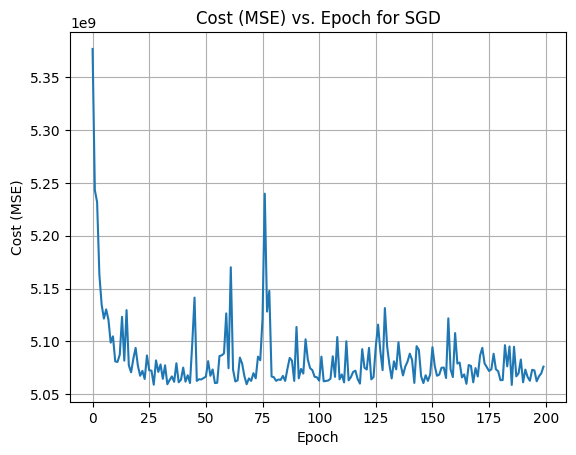

In [27]:
%matplotlib inline
# In a new cell, run this code to see the graph
plt.plot(sgd.cost_history_)
plt.title('Cost (MSE) vs. Epoch for SGD')
plt.xlabel('Epoch')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show() # <-- This command displays the plot

In [28]:
y_pred = sgd.predict(X_test_scaled)

In [29]:
print('r2_score Of mySGDRegressor: ',r2_score(y_test,y_pred))

r2_score Of mySGDRegressor:  0.4683829674579172


In [30]:
from sklearn.linear_model import SGDRegressor

In [31]:
reg = SGDRegressor(max_iter = 200, learning_rate = 'constant',eta0 = 0.0001)

In [32]:
reg.fit(X_train_scaled,y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,200
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [33]:
y_pred = reg.predict(X_test_scaled)

In [34]:
print('r2 score Of Skicit-learn SGDRegressor is : ',r2_score(y_test,y_pred))

r2 score Of Skicit-learn SGDRegressor is :  0.498451344356873


### >r2_score Of Linear Regression: 0.49606402852363796
### >r2_score Of mySGDRegressor:  0.5202523239552943 Hmmmmm... Good Results
### >r2 score Of Skicit-learn SGDRegressor is :  0.5045048078999088

## Now Implementing Mini-Batch Gradient Descent

In [61]:
import numpy as np

class MGDRegressor:

  def __init__(self, batch_size, learning_rate=0.01, epochs=100):
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs
    self.batch_size = batch_size
    self.cost_history_ = []

  def fit(self, X_train, y_train):
    y_train = y_train.values # Ensure y_train is a NumPy array

    # Initialize coefficients
    self.intercept_ = 0
    self.coef_ = np.zeros(X_train.shape[1])

    for i in range(self.epochs):
      # Shuffle the data at the start of each epoch
      indices = np.random.permutation(X_train.shape[0])
      X_train_shuffled = X_train[indices]
      y_train_shuffled = y_train[indices]

      # Loop through the data in mini-batches
      for j in range(0, X_train.shape[0], self.batch_size):
        # Select the mini-batch
        X_batch = X_train_shuffled[j:j+self.batch_size]
        y_batch = y_train_shuffled[j:j+self.batch_size]
        
        # Make predictions for the batch
        y_hat = np.dot(X_batch, self.coef_) + self.intercept_
        
        # Calculate the AVERAGE gradient for the mini-batch
        n_batch_samples = X_batch.shape[0]
        intercept_der = (-2 / n_batch_samples) * np.sum(y_batch - y_hat)
        coef_der = (-2 / n_batch_samples) * np.dot(X_batch.T, (y_batch - y_hat))
        
        # Update parameters
        self.intercept_ = self.intercept_ - (self.lr * intercept_der)
        self.coef_ = self.coef_ - (self.lr * coef_der)

      # Calculate and store cost ONCE at the end of the epoch
      y_pred_epoch = np.dot(X_train, self.coef_) + self.intercept_
      epoch_cost = np.mean((y_train - y_pred_epoch)**2)
      self.cost_history_.append(epoch_cost)

    print(f"Final Intercept: {self.intercept_}")
    print(f"Final Coefficients: {self.coef_}")

  def predict(self, X_test):
    return np.dot(X_test, self.coef_) + self.intercept_

In [62]:
mgd = MGDRegressor(batch_size = 32,learning_rate = 0.0001,epochs = 100)

In [63]:
mgd.fit(X_train_scaled, y_train)

Final Intercept: 207188.82308381418
Final Coefficients: [-18620.69325774 -16783.10855733  11499.80973549  73741.85882984
  -3824.53218961   8242.12126207  -3677.88386063 -30301.30491755
   2462.84717619   2062.31752477   4339.77505022]


In [64]:
# Make predictions and evaluate
y_pred_mb = mgd.predict(X_test_scaled)
r2_mb = r2_score(y_test, y_pred_mb)
print(f"\nR-squared score from Mini-Batch GD: {r2_mb:.4f}")


R-squared score from Mini-Batch GD: 0.5801


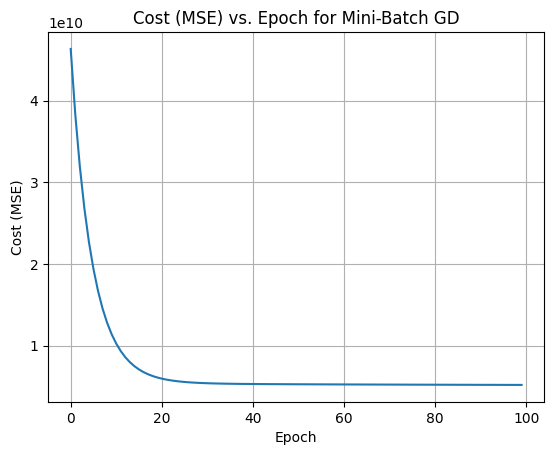

In [66]:
# Plot the learning curve
plt.plot(mgd.cost_history_)
plt.title('Cost (MSE) vs. Epoch for Mini-Batch GD')
plt.xlabel('Epoch')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

## Comparison Of Stochastic and Mini-Batch Gradient Descent

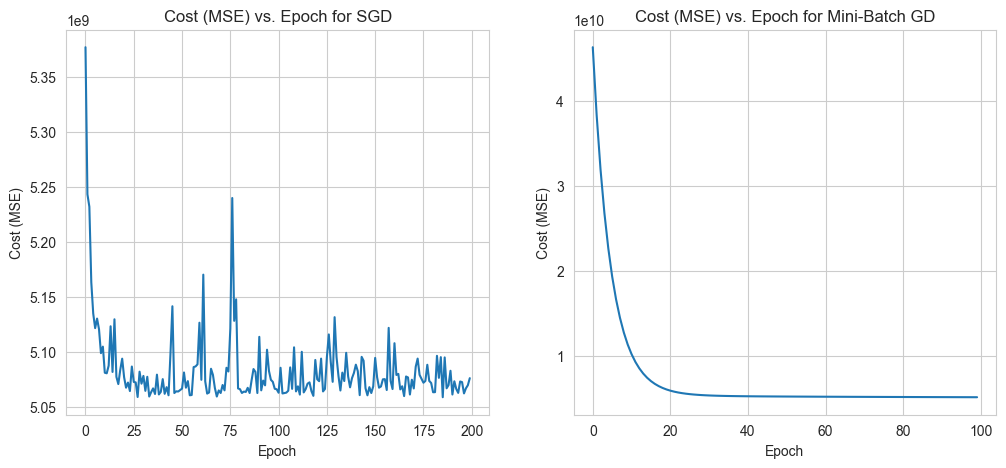

In [68]:
import seaborn as sns

sns.set_style('whitegrid')

fig, axes = plt.subplots(1,2, figsize = (12,5))

#Plot 1
sns.lineplot(data = sgd.cost_history_,ax = axes[0])
axes[0].set_title('Cost (MSE) vs. Epoch for SGD')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cost (MSE)')

#Plot 2
sns.lineplot(data = mgd.cost_history_,ax = axes[1])
axes[1].set_title('Cost (MSE) vs. Epoch for Mini-Batch GD')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Cost (MSE)')


plt.grid(True)
plt.show()